In [1]:
import numpy as np
from scipy.special import expit as sigmoid, logit
import matplotlib.pyplot as plt
import csgm
import torch
import torchvision
import image_utils
import dcgan
import skimage

In [2]:
mnist = torchvision.datasets.MNIST('./', train=False, transform=lambda x: np.array(x)/255.,
                                   target_transform=None, download=True)

In [3]:
test_img = mnist[4][0]

15 3.828124999999997


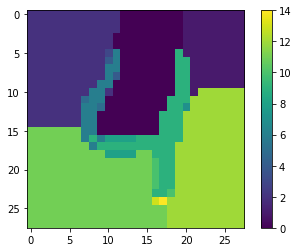

In [4]:
segments = image_utils.create_segments(test_img, kernel_size=2, max_dist=10, ratio=0.2)
plt.imshow(segments), np.max(segments)
plt.colorbar()

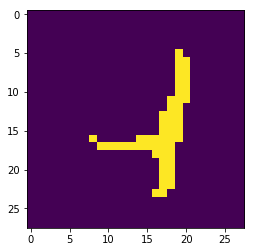

In [5]:
exp = {}
exp['feature']=[9]
_,mask = image_utils.create_mask(test_img,segments,exp)
plt.imshow(mask)

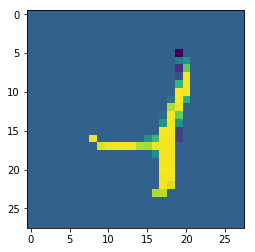

In [6]:
target = ((test_img-0.5)*2) * mask
plt.imshow(target)

In [90]:
G = dcgan.load_generator().cuda()

In [9]:
G.train()

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace)
    (12): ConvTranspose2d(64, 1, kernel_size=(1, 1), stride=(1, 1), padding=(2, 2), bias=False)
    (13): Tanh()
  )
)

In [10]:
import importlib

In [98]:
importlib.reload(csgm)

<module 'csgm' from '/home/kurtis/Desktop/anchor/ImageAnchors/csgm.py'>

In [68]:
x[64]

0.03738705667198103

In [72]:
x.shape

(100,)

In [94]:
G.train();

In [99]:
z, recon, background = csgm.reconstruct_batch_threshold(target, mask, np.sum(mask), G, 100, threshold=x)

0.077080406
0.07078957
0.065675266
0.051930103
0.0519534
0.051146295
0.049653426
0.053558677
0.054573942
0.04964095
0.0511395
0.047510926
0.0495447
0.051628288
0.047509935
0.047731638
0.050153654
0.045034595
0.047492586
0.043786094
restarting with  44  left
0.1018578
0.090596
0.053780135
0.04680123
0.052457895
0.046199962
0.047473073
0.044011425
0.04446882
0.042750306
0.039708607
0.041079663
0.039923947
0.037284415
0.03652869
0.034962997
0.037346393
0.03640753
0.032267004
0.03174049
restarting with  4  left
0.12730205
0.06474799
0.03536685
0.038531706
0.0379275
0.029828398


In [79]:
z.shape

(100, 100, 1, 1)

In [80]:
recon.shape

(100, 28, 28)

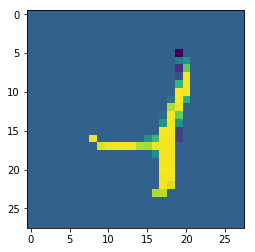

In [23]:
plt.imshow(target)

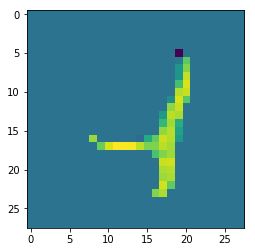

In [24]:
plt.imshow(recon[0]*mask)

In [25]:
print( np.sqrt(np.sum( (recon[0]*mask - target) ** 2 )/np.sum(mask) ))

0.19646015982727325


In [26]:
x

array([0.0458154 , 0.04580955, 0.03562134, 0.0419808 , 0.04830588,
       0.04330686, 0.04919067, 0.04926091, 0.04463404, 0.04175588,
       0.0473591 , 0.0317543 , 0.04706499, 0.0339813 , 0.03267125,
       0.04915529, 0.04290936, 0.04826972, 0.04796605, 0.04980363,
       0.0495332 , 0.03410337, 0.03654693, 0.03853688, 0.04060611,
       0.04370687, 0.04629409, 0.04689304, 0.04963337, 0.0491184 ,
       0.03864073, 0.03022632, 0.04110238, 0.03894768, 0.03811239,
       0.03895564, 0.04372223, 0.04571913, 0.04563116, 0.04771431,
       0.04748044, 0.04606528, 0.04119256, 0.04194054, 0.02963715,
       0.04589503, 0.04603018, 0.03072805, 0.04888068, 0.04780384,
       0.04597193, 0.03302205, 0.0426869 , 0.0443224 , 0.04433999,
       0.02718048, 0.04547274, 0.04733449, 0.04384287, 0.04036788,
       0.04081556, 0.04251347, 0.04715359, 0.03600808, 0.03738706,
       0.04443669, 0.04808081, 0.04609238, 0.04756217, 0.04457436,
       0.04231923, 0.04318143, 0.0484097 , 0.0454467 , 0.04531

In [81]:
taus = []
for i in range(recon.shape[0]):
    taus.append(np.sum((recon[i]*mask - target)**2)/np.sum(mask))

(array([ 1.,  4.,  5.,  3.,  6., 11., 13., 17., 21., 19.]),
 array([0.02711279, 0.02938234, 0.03165189, 0.03392144, 0.03619099,
        0.03846054, 0.04073009, 0.04299964, 0.04526919, 0.04753874,
        0.04980829]),
 <a list of 10 Patch objects>)

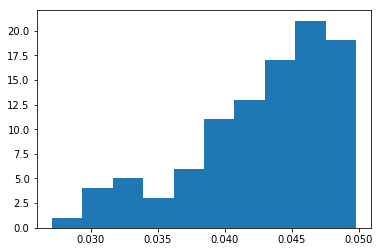

In [82]:
plt.hist(taus)

In [85]:
np.sort(taus)[::-1] - np.sort(x)[::-1]

array([-6.15793927e-05, -2.13083525e-04, -3.24912678e-04, -4.40510972e-04,
       -4.26846060e-04, -2.15639291e-04, -1.52308546e-04, -1.36603774e-04,
       -2.36553682e-04, -2.11281789e-04, -2.29553883e-04, -5.80695139e-04,
       -5.46441200e-04, -5.15786788e-04, -5.09548135e-04, -2.97565882e-04,
       -3.49108896e-04, -4.06918391e-04, -3.63434481e-04, -5.70297042e-04,
       -5.64227252e-04, -5.48482136e-04, -5.80716817e-04, -5.64044929e-04,
       -4.50874636e-04, -3.71624808e-04, -2.65391939e-04, -2.83940744e-04,
       -3.17002380e-04, -5.32138984e-04, -4.70145840e-04, -7.03935069e-04,
       -2.83993587e-04, -1.74513692e-04, -1.56932159e-04, -3.01447053e-04,
       -2.46037027e-04, -2.74582714e-04, -3.38748051e-04, -5.13322368e-04,
       -5.23389214e-04, -5.58174991e-04, -4.28494179e-04, -4.79845245e-04,
       -5.41713985e-04, -5.65802290e-04, -2.14593202e-04, -1.58873105e-04,
       -5.73336773e-05, -2.50714765e-04, -3.76861717e-04, -3.93196504e-04,
       -2.23210083e-04, -

(array([ 1.,  3.,  6.,  3.,  6.,  8., 15., 14., 20., 24.]),
 array([0.02718048, 0.02944942, 0.03171836, 0.03398729, 0.03625623,
        0.03852517, 0.04079411, 0.04306305, 0.04533199, 0.04760093,
        0.04986987]),
 <a list of 10 Patch objects>)

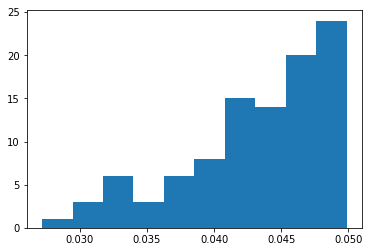

In [83]:
plt.hist(x)

In [62]:
np.sort(x)[::-1]

array([0.04986987, 0.04980363, 0.04979482, 0.04963337, 0.0495332 ,
       0.04926091, 0.04919067, 0.04916657, 0.04915529, 0.0491184 ,
       0.04909588, 0.04905234, 0.04892642, 0.04888068, 0.04869377,
       0.0484097 , 0.04830588, 0.04826972, 0.04820771, 0.04808081,
       0.04796605, 0.04785059, 0.04780384, 0.04771431, 0.04756217,
       0.04748044, 0.0473591 , 0.04733449, 0.04727869, 0.04715359,
       0.04706499, 0.04689304, 0.04629409, 0.04609238, 0.04606528,
       0.04603018, 0.04597193, 0.04589503, 0.0458154 , 0.04580955,
       0.04571913, 0.04563116, 0.04547274, 0.0454467 , 0.0453172 ,
       0.04516492, 0.04463404, 0.04457436, 0.04443669, 0.04433999,
       0.0443224 , 0.04402964, 0.04384287, 0.04372223, 0.04370687,
       0.04363204, 0.04330686, 0.04318143, 0.04290936, 0.04275252,
       0.0426869 , 0.04264385, 0.04251347, 0.04231923, 0.0419808 ,
       0.04194054, 0.04175588, 0.04150289, 0.04119256, 0.04112887,
       0.04110238, 0.04083702, 0.04081556, 0.04060611, 0.04036

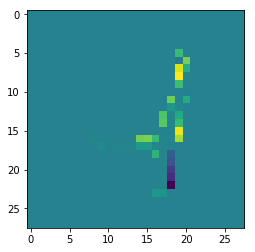

In [99]:
plt.imshow( (G(torch.from_numpy(z[0:1]).cuda()).squeeze().data.cpu().numpy() + 1)/2 * mask - target)

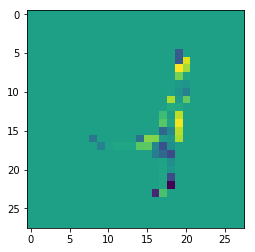

In [76]:
plt.imshow( (recon[0] * mask) - target)

## Testing Anchor

In [11]:
import anchor_image
import importlib

In [8]:
net = dcgan.Net()
net.load_state_dict(torch.load('mnist_cnn.pt'))

In [9]:
def predict_fn(images):
    try:
        images = torch.from_numpy(images).type(torch.FloatTensor)
    except:
        pass
    return net(images.view(images.shape[0],1,28,28)).data.numpy()

In [12]:
importlib.reload(anchor_image)
importlib.reload(csgm)

<module 'csgm' from '/home/kurtis/Desktop/anchor/ImageAnchors/csgm.py'>

In [13]:
import pretrained_models

In [14]:
explainer = anchor_image.AnchorImageMNIST([], 'yeet', # dummys = mnist_test,
                               G=lambda x: dcgan.load_generator(False), dataset = mnist,batch_norm=True,
                                true_sampling=True, threshold=0.05, encode=True, 
                                encoder = lambda x: pretrained_models.load_encoder(device=x))

In [213]:
best_coverage, segments, exp = explainer.explain_instance(test_img,predict_fn,verbose=True)

15 3.828125000000001
True pred 4
Taking coverage data...
Checkpoint 1
Making tuples...
Best: 14 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 1 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 9 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 2 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 8 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 3 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 0 (mean:1.0000000000, n: 1, lb:0.0000) Worst: 4 (mean:0.0000, n: 1, ub:1.0000) B = 1.00
Best: 9 (mean:0.6930693069, n: 101, lb:0.4200) Worst: 5 (mean:0.0000, n: 1, ub:1.0000) B = 0.58
Best: 9 (mean:0.7462686567, n: 201, lb:0.5564) Worst: 6 (mean:0.0000, n: 1, ub:1.0000) B = 0.44
Best: 9 (mean:0.7674418605, n: 301, lb:0.6157) Worst: 7 (mean:0.0000, n: 1, ub:1.0000) B = 0.38
Best: 9 (mean:0.7830423940, n: 401, lb:0.6542) Worst: 10 (mean:0.0000, n: 1, ub:1.0000) B = 0.35
Best: 9 (mean:0.7824351297, n: 501, lb:0.6676) Worst: 11 (mean:0.0000, n: 1, ub:1.0000) B = 0.33
Best: 9 (mean:0.7787021631, n: 601, lb:0.6737) Worst: 

In [15]:
exp_ = {}
# exp_['feature']=[i[0] for i in exp]
exp_['feature'] = [0,9]
_,mask = image_utils.create_mask(test_img,segments,exp_)

In [16]:
anchored = mask*((test_img-0.5)*2)
# final = (1-mask)* + target

Text(0.5,1,'Anchored Image')

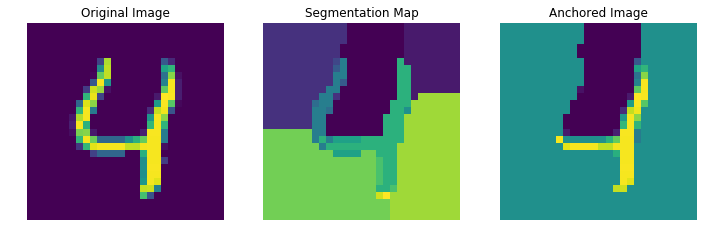

In [17]:
fig, ax = plt.subplots(1,3,figsize = (12,12))
[ax[i].set_axis_off() for i in range(3)]
ax[0].imshow((test_img-0.5)*2, vmin=-1,vmax=1)
ax[0].set_title('Original Image')
ax[1].imshow(segments)
ax[1].set_title('Segmentation Map')
ax[2].imshow(anchored,vmin=-1, vmax=1)
ax[2].set_title('Anchored Image')
# ax[1].imshow(final,vmin=-1, vmax=1)
# plt.axis('off');

In [18]:
G = dcgan.load_generator().cuda().train();

In [65]:
t

[tensor([0.0492], device='cuda:0'),
 tensor([0.0478], device='cuda:0'),
 tensor([0.0469], device='cuda:0'),
 tensor([0.0464], device='cuda:0'),
 tensor([0.0462], device='cuda:0'),
 tensor([0.0437], device='cuda:0'),
 tensor([0.0433], device='cuda:0'),
 tensor([0.0417], device='cuda:0'),
 tensor([0.0379, 0.0369], device='cuda:0')]

In [74]:
importlib.reload(csgm)

<module 'csgm' from '/home/kurtis/Desktop/anchor/ImageAnchors/csgm.py'>

In [66]:
num_samples = 64
x = explainer.sample_p(num_samples)
x

array([0.03701675, 0.04307985, 0.04879601, 0.04643191, 0.03581401,
       0.04626749, 0.0470147 , 0.04722167, 0.0494855 , 0.03948641,
       0.04589067, 0.04740879, 0.0402539 , 0.03683638, 0.03520907,
       0.04900624, 0.04553949, 0.04717908, 0.04169601, 0.04243108,
       0.04722624, 0.04065669, 0.04320919, 0.04747138, 0.04035582,
       0.04831483, 0.0424976 , 0.04456202, 0.04952756, 0.04834612,
       0.03754702, 0.04958978, 0.03467719, 0.03447922, 0.0426988 ,
       0.04998017, 0.04322689, 0.03403173, 0.04625552, 0.03868981,
       0.02737729, 0.04180519, 0.04342295, 0.03818896, 0.03793837,
       0.03157155, 0.04502395, 0.04369461, 0.04617874, 0.04126842,
       0.04108816, 0.04588583, 0.04526253, 0.04342354, 0.04522544,
       0.04732249, 0.04982617, 0.04707543, 0.0473434 , 0.04284382,
       0.04454364, 0.03821433, 0.04741575, 0.04652829])

In [68]:
np.sort(x)

array([0.02737729, 0.03157155, 0.03403173, 0.03447922, 0.03467719,
       0.03520907, 0.03581401, 0.03683638, 0.03701675, 0.03754702,
       0.03793837, 0.03818896, 0.03821433, 0.03868981, 0.03948641,
       0.0402539 , 0.04035582, 0.04065669, 0.04108816, 0.04126842,
       0.04169601, 0.04180519, 0.04243108, 0.0424976 , 0.0426988 ,
       0.04284382, 0.04307985, 0.04320919, 0.04322689, 0.04342295,
       0.04342354, 0.04369461, 0.04454364, 0.04456202, 0.04502395,
       0.04522544, 0.04526253, 0.04553949, 0.04588583, 0.04589067,
       0.04617874, 0.04625552, 0.04626749, 0.04643191, 0.04652829,
       0.0470147 , 0.04707543, 0.04717908, 0.04722167, 0.04722624,
       0.04732249, 0.0473434 , 0.04740879, 0.04741575, 0.04747138,
       0.04831483, 0.04834612, 0.04879601, 0.04900624, 0.0494855 ,
       0.04952756, 0.04958978, 0.04982617, 0.04998017])

In [79]:
x = np.array([0.02,0.02,0.03,0.03,0.04,0.04,0.05,0.05])

In [135]:
_,raw_reconstruct,background = csgm.reconstruct_batch_threshold(anchored, mask, np.sum(mask), G, x.shape[0], x, lr=.1)

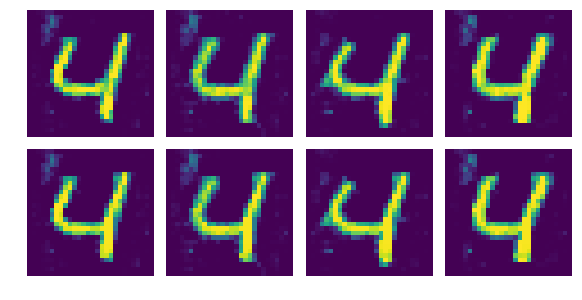

In [136]:
plt.figure(figsize=(10,10))
ax = [plt.subplot(4,4,i+1) for i in range(8)]
plt.subplots_adjust(wspace=0, hspace=0.1);
[ax[i].set_axis_off() for i in range(8)]
ax[0].imshow(raw_reconstruct[2])
ax[1].imshow(raw_reconstruct[4])
ax[2].imshow(raw_reconstruct[6])
ax[3].imshow(raw_reconstruct[7])
ax[4].imshow(background[2] + anchored)
ax[5].imshow(background[4] + anchored)
ax[6].imshow(background[6] + anchored)
ax[7].imshow(background[7] + anchored)

In [137]:
taus = []
for i in range(raw_reconstruct.shape[0]):
    taus.append(np.sum((raw_reconstruct[i]*mask - anchored)**2)/np.sum(mask))

In [138]:
np.sort(taus)

array([0.01932084, 0.01976731, 0.02864346, 0.0293501 , 0.03893855,
       0.03921625, 0.04552193, 0.04976724])

## Some Visuals

In [139]:
sort_idx = np.argsort(taus)
recon = raw_reconstruct[sort_idx]

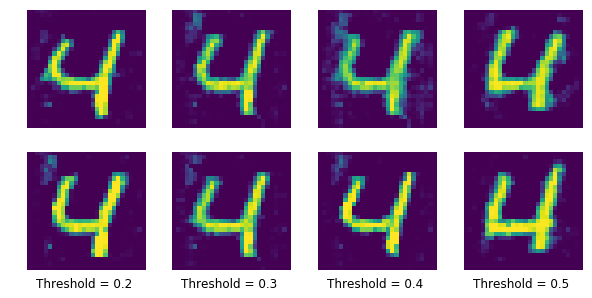

In [140]:
# fig, ax = plt.subplots(2,4,figsize = (12,12))
fig = plt.figure(figsize=(10,10))
ax = [plt.subplot(4,4,i+1) for i in range(8)]
# plt.subplots_adjust(wspace=0, hspace=0.1);
for i in range(4):
    for j in range(2):
#         print(4*j + i)
        ax[4*j + i].set_axis_off()
        ax[4*j + i].imshow( (recon[i*2 + j] + 1)/2 )
        if j == 1:
            ax[4*j + i].set_title("Threshold = %.1f " % (.1*(i+2) ), y = -0.2)
# plt.axis('off');